In [1]:
from argparse import Namespace
from dataset import TextDataset
from classifier import BOWClassifier
import torch

/home/nik/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Matplotlib created a temporary config/cache directory at /tmp/matplotlib-8ofy_mh4 because the default path (/home/nik/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
def use_cuda():
    return torch.device("cuda" if torch.cuda.is_available() else "cpu")

args = Namespace (
    in_features=None,
    units_per_layer=[128, 64],
    dataset=None,
    optimizer="Adam",
    criterion="bce_logits",
    save_dir='../trained_models/bow.pth',
    batch_size=128,
    learning_rate=0.001,
    num_epochs=5,
    device=use_cuda(),
    binary_class=True
)

In [3]:
args.dataset = TextDataset.load_dataset_and_make_vectorizer("../data/IMDB-dataset.csv")
args.in_features = len(args.dataset.get_vectorizer().text_vocab)
args.out_features = len(args.dataset.get_vectorizer().label_vocab)

In [4]:
bow = BOWClassifier(args=args)
bow = bow.to(args.device)
bow.setup()
bow.fit()

100%|██████████| 5/5 [01:07<00:00, 13.40s/it]


In [5]:
loss, acc = bow.eval_net(mode='test')
print(loss)
print(acc)

0.4007328945474746
88.28124999999999


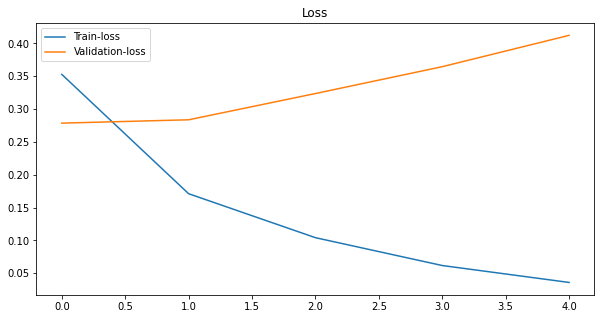

In [6]:
bow.plot_loss_logs()

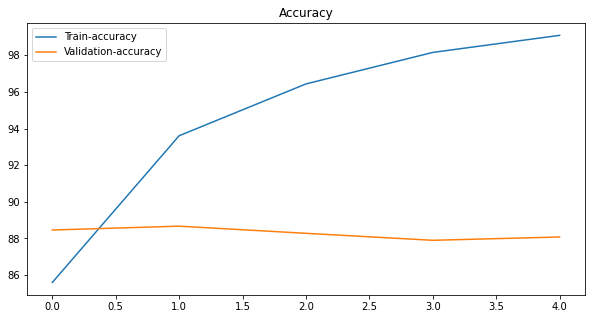

In [7]:
bow.plot_acc_logs()